# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from numpy.random import seed
from scipy.stats import ttest_ind
medical = pd.read_csv('insurance2.csv')

In [2]:
medical.shape

(1338, 8)

In [3]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__

In [4]:
# First lets calculate the mean and std to be able to point these values on the histogram.

mu = np.mean(medical.charges)
std = np.std(medical.charges, ddof=1)
median = np.median(medical.charges)
print('The mean of the charges is:', mu)
print('The std of the charges is:', std)
print('The median of the charges is:', median)

The mean of the charges is: 13270.422265141257
The std of the charges is: 12110.011236693994
The median of the charges is: 9382.033


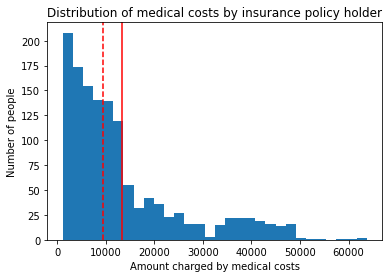

In [5]:
_ = plt.hist(medical.charges, bins=30)
_ = plt.xlabel('Amount charged by medical costs')
_ = plt.ylabel('Number of people')
_ = plt.title('Distribution of medical costs by insurance policy holder')
_ = plt.axvline(mu, color='r')
_ = plt.axvline(median, color='r', linestyle='--')

This distribution is skewed to the right, so definitely it is not a normal distribution. The mean is also affected by the big positive values (outliers). We can see the difference between the mean (solid line) and the median (dotted line).

__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__ Since we are assuming that these data represent a random sample of charges and also that our sample size is big enough, we could get the distribution of the means of samples and apply the Central Limit Theorem (we assume this sampling distribution is a normal distribution) to try to approximate to the real mean value and standard deviation of the population.

__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A:__ The administrator's concern is that the average charge is ___less___ than 12,000, so we only care about testing a hypothesis on one side of the distribution. Because of this we should have a one-sided confidence interval. 

In [6]:
# we make the function for drawing n samples from the medical dataset

def medical_sampler(n):
    return np.random.choice(medical.charges, n)

In [7]:
# then we take the samples
seed(47)

empty=[]
samples = [np.mean(np.append(empty, medical_sampler(50))) for i in range(10000)]
samples_mu = np.mean(samples)
samples_std = np.std(samples)
print('The mean of the distribution of means of samples size 50 is:', samples_mu)
print('The standard deviation of the distribution of means of samples size 50 is:', samples_std)

The mean of the distribution of means of samples size 50 is: 13267.343653241584
The standard deviation of the distribution of means of samples size 50 is: 1706.9304026749085


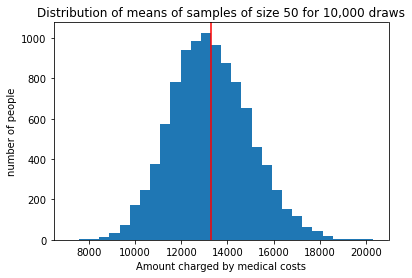

In [8]:
_ = plt.hist(samples, bins=30)
_ = plt.xlabel('Amount charged by medical costs')
_ = plt.ylabel('number of people')
_ = plt.title('Distribution of means of samples of size 50 for 10,000 draws')
_ = plt.axvline(samples_mu, color='r')

In [9]:
# we calculate the std from the central limit theorem using the sample size of 50

CLT_std_50 = std/np.sqrt(50)
print('The CLT standard deviation of the distribution of means of samples size 50 is:', CLT_std_50)

The CLT standard deviation of the distribution of means of samples size 50 is: 1712.6142131423223


In [10]:
# We calculate the critical t value since we don't know the standard deviation of the population

n = 50
t_value = t.ppf(.95, n-1)
std_error = samples_std / np.sqrt(n)
margin_error = t_value * std_error
lower = samples_mu - margin_error
print('The confidence interval is lower at ', lower)

The confidence interval is lower at  12862.630282477683


The administrator should not be concerned because the value obtained is above the 12,000 that he is worried about.

The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

__A:__ We are assuming that the variances of the two groups are equal.

__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ 

In [11]:
# Let's get the two groups to get the summary statistics on each of them

insurance = medical['charges'].loc[medical['insuranceclaim']==1]
no_insurance = medical['charges'].loc[medical['insuranceclaim']==0]

In [12]:
# we calculate the summary statistics for the t-test statistic

n0 = len(insurance)
x0 = np.mean(insurance)
s0 = np.std(insurance)
            
n1 = len(no_insurance)
x1 = np.mean(no_insurance)
s1 = np.std(no_insurance)

In [13]:
# no we calculate the pooled standard deviation and the t-test statistic

sp = np.sqrt(((n0 - 1) * s0 ** 2 + (n1 - 1) * s1 ** 2) / (n0 + n1 - 2))
t_statistic = (x0 - x1) / (sp * np.sqrt((1 / n0) + (1 / n1)))
t_statistic

11.901306943555385

In [14]:
# Finally we calculate the p-value using t.cdf, t_statistic and the degrees of freedom (df)

df = n0 + n1 - 2
p_value = 2 * (1 - t.cdf(abs(t_statistic), df))
p_value

0.0

In [15]:
# Now we do the same calculation for the t-test statistic and p-value but this time using ttest_ind() function

ttest_ind(insurance, no_insurance)

Ttest_indResult(statistic=11.893299030876712, pvalue=4.461230231620717e-31)

According to the results above, we see that the p-value is very low so we can conclude that both types of patients (with and without insurance) are not charged the same.

Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__ I could not find a similar z-test function in the scipy.stats. Maybe the reason is that for calculating the z value we need to know that standard deviation of the population, which is rare that we have it.

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test